In [1]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Dataset1 .csv')
table_booking_percentage = (data['Has Table booking'].value_counts(normalize=True) * 100).round(2)
print("Percentage of restaurants with and without table booking : ")
print(table_booking_percentage)

Percentage of restaurants with and without table booking : 
Has Table booking
No     87.88
Yes    12.12
Name: proportion, dtype: float64


In [5]:
online_delivery_percentage = (data['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Percentage of restaurants with and without online delivery : ")
print(online_delivery_percentage)

Percentage of restaurants with and without online delivery : 
Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64


/tmp/ipython-input-884132696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has Table booking', data=data, palette='Set2')


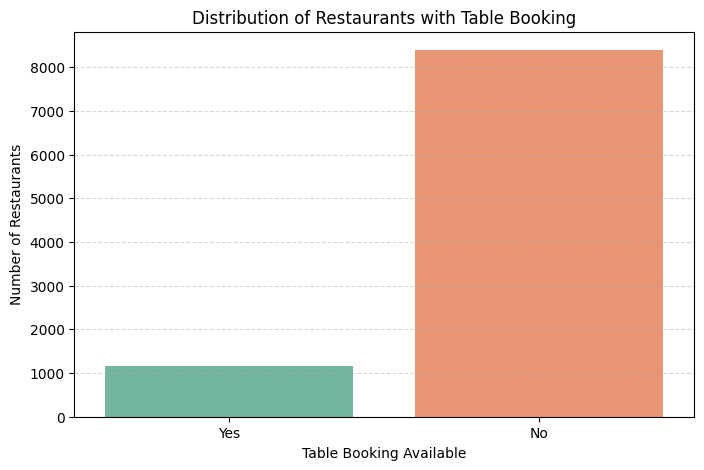

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='Has Table booking', data=data, palette='Set2')
plt.title('Distribution of Restaurants with Table Booking')
plt.xlabel('Table Booking Available')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [7]:
avg_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average rating of restaurants with table booking:", round(avg_rating_with_table_booking, 2))
print("Average rating of restaurants without table booking:", round(avg_rating_without_table_booking, 2))

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


/tmp/ipython-input-3617090848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has Online delivery', data=data, palette='Set1')


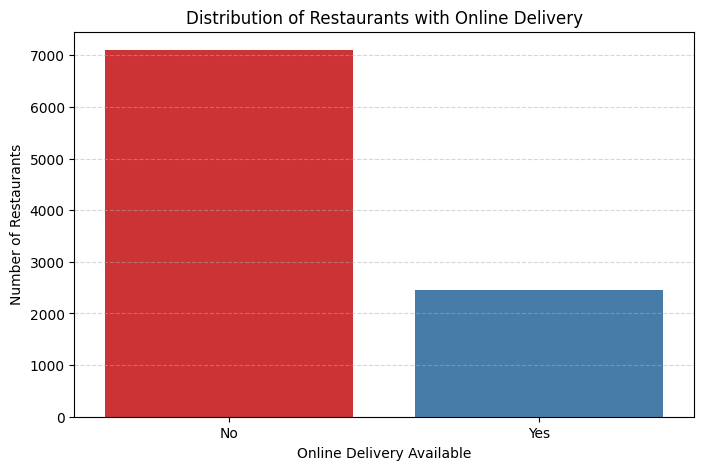

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Has Online delivery', data=data, palette='Set1')
plt.title('Distribution of Restaurants with Online Delivery')
plt.xlabel('Online Delivery Available')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-2581163379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=data, palette='muted')


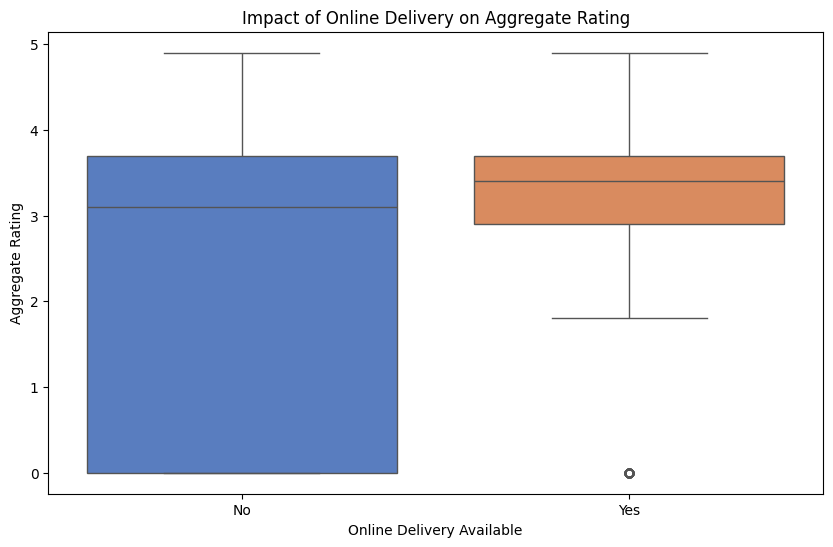

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=data, palette='muted')
plt.title('Impact of Online Delivery on Aggregate Rating')
plt.xlabel('Online Delivery Available')
plt.ylabel('Aggregate Rating')
plt.show()

In [11]:
data['Price Range Category'] = pd.cut(data['Average Cost for two'], bins=[0, 500, 1000, 1500, 5000], labels=['Low', 'Medium', 'High', 'Very High'])
online_delivery_by_price = data.groupby('Price Range Category')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Percentage of restaurants offering online delivery by price range:")
print(online_delivery_by_price.round(2))

Percentage of restaurants offering online delivery by price range:
Has Online delivery      No    Yes
Price Range Category              
Low                   82.12  17.88
Medium                54.91  45.09
High                  64.81  35.19
Very High             77.90  22.10


/tmp/ipython-input-539805817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_delivery_by_price = data.groupby('Price Range Category')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0) * 100


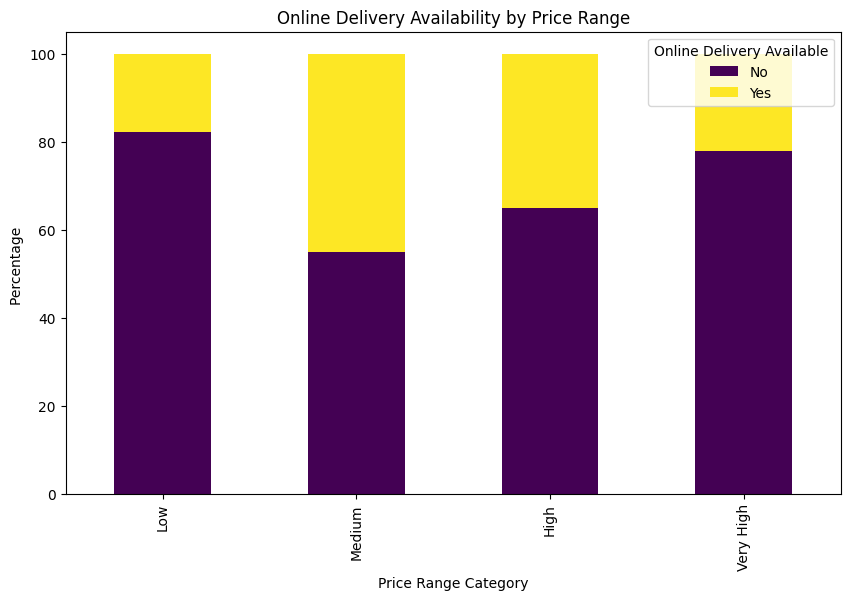

In [13]:
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Percentage ')
plt.legend(title='Online Delivery Available')
plt.show()